In [1]:
from Tester import Tester 
import robot_color_tracking as track
import numpy as np
    
trackers = {
    'ArUco' : track.ArucoTrack(img_width=600)
}

tester = Tester(trackers=trackers,id_options=['0','1','2','3'])
tester.load_positions()
tester.evaluate_error()
# tester.save_error_and_time()
# tester.load_error()
# pos_data = tester.filter_place_methods(tester.positions_data, 'night center bulb')
# err = tester.filter_place_methods(tester.error, 'night center bulb')
# tester.get_statistics_by_place() # pos_data=pos_data, err=err±±±±±±±±±±±±±±±±±±±±±±±±±±
# np.array(tester.positions_data['ArUco']['IMG_20210522_130341.jpg']['position']['0']).mean(axis=0)

Tester was initialized
Real positions loaded
ArUco: 100.00%    i: 0


In [4]:
tester.get_statistics_by_place()
tester.error


Statistics calculated


{'ArUco': {'IMG_20210522_130341.jpg': {'false_negative_total': 0,
   'false_positive_total': 0,
   'false_negative': {'0': 0},
   'false_positive': {'0': 0},
   'position_error': {'0': [48.12097532919046]},
   'angle_error': {'0': None},
   'place': 'daylight',
   'tags': ['v3']},
  'IMG_20210522_130352.jpg': {'false_negative_total': 0,
   'false_positive_total': 0,
   'false_negative': {'0': 0},
   'false_positive': {'0': 0},
   'position_error': {'0': [39.98189662979486]},
   'angle_error': {'0': None},
   'place': 'daylight',
   'tags': ['v3']},
  'IMG_20210522_130403.jpg': {'false_negative_total': 0,
   'false_positive_total': 0,
   'false_negative': {'0': 0},
   'false_positive': {'0': 0},
   'position_error': {'0': [39.74300646064656]},
   'angle_error': {'0': None},
   'place': 'daylight',
   'tags': ['v3']},
  'IMG_20210522_130414.jpg': {'false_negative_total': 0,
   'false_positive_total': 0,
   'false_negative': {'0': 0},
   'false_positive': {'0': 0},
   'position_error': {'

{'0': [array([3549.5, 2807. ])], '2': [array([2013.25, 2649.75])], '3': [array([2632.75, 1071.5 ])]}
[array([[[3417.6   , 2697.6   ],
        [3600.0002, 2668.8   ],
        [3628.8   , 2841.6   ],
        [3456.0002, 2880.    ]]], dtype=float32), array([[[1872.0001, 2553.6   ],
        [2054.4001, 2496.    ],
        [2102.4001, 2678.4001],
        [1920.0001, 2726.4001]]], dtype=float32), array([[[3676.8   , 1756.8   ],
        [3840.0002, 1833.6001],
        [3753.6   , 1996.8   ],
        [3600.0002, 1910.4   ]]], dtype=float32), array([[[2496.    , 1104.    ],
        [2553.6   ,  931.2   ],
        [2726.4001,  998.4   ],
        [2668.8   , 1161.6001]]], dtype=float32)]
{'0': array([[3525.6, 2772. ]], dtype=float32), '2': array([[1987.2002, 2613.6   ]], dtype=float32), '1': array([[3717.6, 1874.4]], dtype=float32), '3': array([[2611.2, 1048.8]], dtype=float32)}


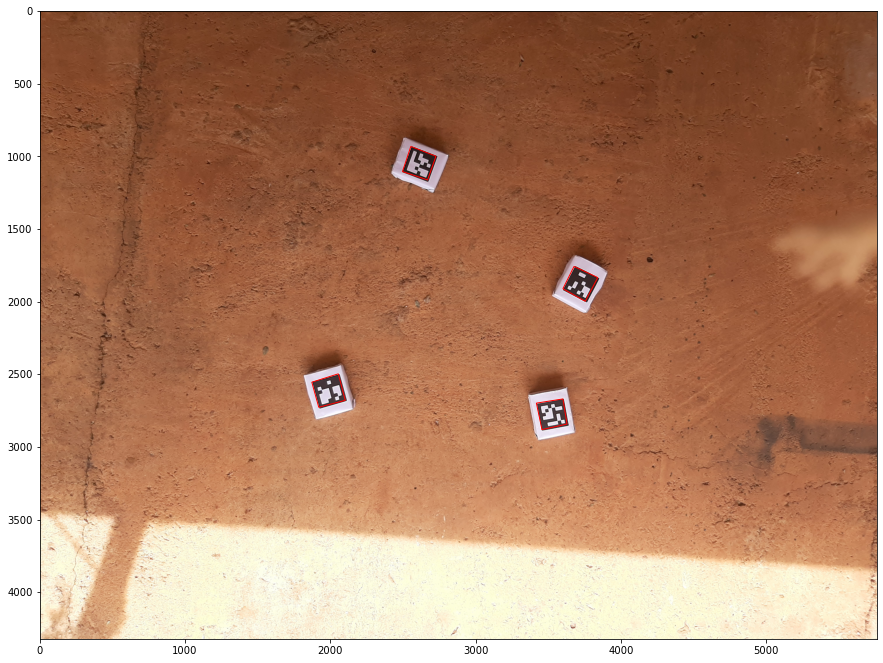

In [5]:
import cv2
import cv2.aruco as aruco
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

## tester.error
fig, ax = plt.subplots(figsize=(15,15))

# Display the image
img = 'IMG_20210522_131638'

trackers['ArUco'].track('../img/ArUco/'+img+'.jpg')
im = cv2.imread('../img/ArUco/'+img+'.jpg')
ax.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
markerCorners = tester.positions_data['ArUco'][img+'.jpg']['position']
print(markerCorners)
print(trackers['ArUco'].markerCorners)
print(trackers['ArUco'].getPoses())
# trackers['ArUco'].printRobotLocation()
# print()
for idx, i in enumerate(markerCorners):
#     print(markerCorners[i])
    # Create a Rectangle patch
    rect = patches.Polygon(markerCorners[i],closed=True, linewidth=1, edgecolor='b', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)
for i in trackers['ArUco'].markerCorners:
    # Create a Rectangle patch
    #print(idx)
    rect = patches.Polygon(i[0],closed=True, linewidth=1, edgecolor='r', facecolor='none')
    
    # Add the patch to the Axes
    ax.add_patch(rect)
center = np.array([3182.4, 993.6])
# print(center)
# ax.text(center[0], center[1], '0', color='red', horizontalalignment='center',verticalalignment='center')
# center = np.array(markerCorners['0']).mean(axis=0)
# print(center)
# ax.text(center[0], center[1], '0', color='blue', horizontalalignment='center',verticalalignment='center')

plt.show()

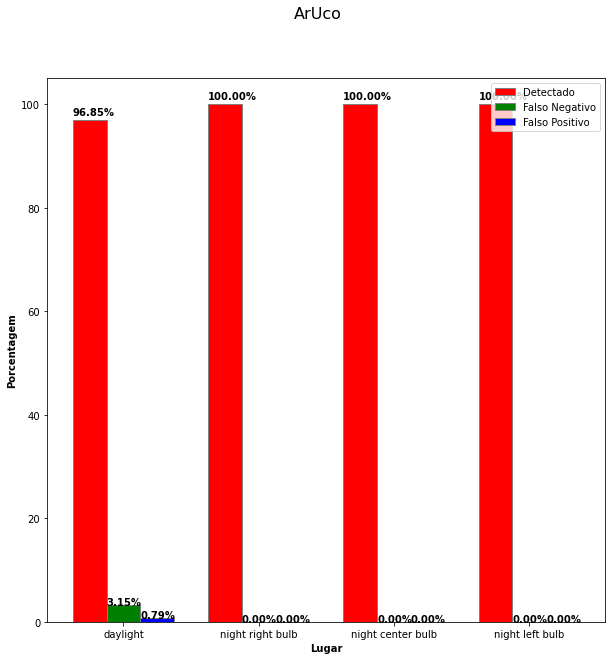

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 

statistics = tester.statistics
controlled_variable = ["daylight", "night right bulb", "night center bulb", "night left bulb"] # tester.id_options #
methods = statistics
timeOfTrack = tester.timeOfTrack
# Gráfico com índices de detecção

for m in statistics:
    plt.figure(figsize=(10,10))
    axes = []
    axes.append(plt.bar(range(1, 4*len(controlled_variable), 4), [statistics[m][p]['detected'] for p in controlled_variable], color ='r', width =1, 
            edgecolor ='grey', label ='Detectado') )
    axes.append( plt.bar(range(2, 4*len(controlled_variable), 4), [statistics[m][p]['false_negative'] for p in controlled_variable], color ='g', width = 1, 
            edgecolor ='grey', label ='Falso Negativo') )
    axes.append( plt.bar(range(3, 4*len(controlled_variable), 4), [statistics[m][p]['false_positive'] for p in controlled_variable], color ='b', width = 1, 
            edgecolor ='grey', label ='Falso Positivo') )
    
    # Add annotation to bars
    for ax in axes:
        for i in ax.patches: 
            plt.text(i.xy[0], i.get_height()*1.01,  
                     str(format(i.get_height(), '.2f'))+'%', 
                     fontsize = 10, fontweight ='bold', 
                     color ='black') 
    # Adding Xticks
    plt.xlabel('Lugar', fontweight ='bold') 
    plt.ylabel('Porcentagem', fontweight ='bold') 
    plt.xticks(list(range(2, 4*len(controlled_variable), 4)),
               controlled_variable) 
    plt.suptitle(m, fontsize=16)
    plt.legend()
    plt.savefig('../algorithm_performance_data/graphs/ArU.png')
    plt.show()